### Linear regression: three methods in Python

This notebook shows three different methods of implementing linear regression in Python, using the relationship between nitrate and phosphate as an example.

First, import libraries and load WCOA 2007 cruise data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from scipy import stats
import statsmodels.formula.api as smf

In [2]:
filename07 = 'data/week03_wcoa_cruise_2007/32WC20070511.exc.csv'

In [3]:
df07 = pd.read_csv(filename07,header=29, na_values=-999,parse_dates=[[6,7]])

Create $x$ and $y$ variables.

In [4]:
x = df07['PHSPHT']
y = df07['NITRAT']

Plot data.

Text(0,0.5,'Nitrate [$\\mu$mol/kg]')

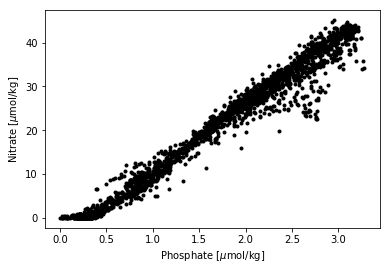

In [5]:
plt.figure()
plt.plot(x,y,'k.')
plt.xlabel('Phosphate [$\mu$mol/kg]')
plt.ylabel('Nitrate [$\mu$mol/kg]')

Create a subset where both variables have finite values.

In [6]:
ii = np.isfinite(x+y) # subset of x and y

#### Method 1: Numpy

Coefficients (slope and intercept)

In [7]:
p = np.polyfit(x[ii],y[ii],1)
p

array([14.74003452, -3.93257206])

Calculate model values

In [8]:
yhat = p[0]*x + p[1]

Draw regression line

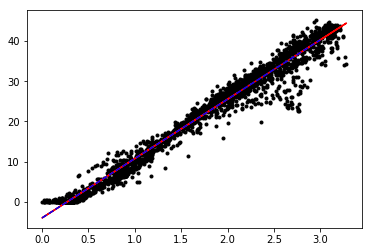

In [9]:
plt.figure()
plt.plot(x[ii],y[ii],'k.')
plt.plot(x[ii],yhat[ii],'r-')
plt.plot(np.array([0,3]),
         p[0]*np.array([0,3]) +
         p[1],'b--')

#### Method 2: Scipy

In [10]:
result = stats.linregress(x[ii],y[ii])

In [11]:
result

LinregressResult(slope=14.740034517902107, intercept=-3.9325720551997954, rvalue=0.9860645445968036, pvalue=0.0, stderr=0.05292378356970245)

In [12]:
result.slope

14.740034517902107

#### Method 3: statsmodels

Ordinary least squares fit using [statsmodels](https://www.statsmodels.org/).

In [13]:
smres = smf.ols('NITRAT ~ PHSPHT',df07).fit() # ordinary least squares

In [14]:
smres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 NITRAT   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                 7.757e+04
Date:                Tue, 03 Mar 2020   Prob (F-statistic):               0.00
Time:                        18:55:46   Log-Likelihood:                -4993.9
No. Observations:                2210   AIC:                             9992.
Df Residuals:                    2208   BIC:                         1.000e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.9326      0.103    -38.336      0.000      -4.134      -3.731
PHSPHT        14.7400      0.053    278.514      0.000      14.636      14.844
==============================================================================
Omnibus:                      874.728   Durbin-Watson:                   0.269
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5147.310
Skew:                          -1.766   Prob(JB):                         0.00
Kurtosis:                       9.589   Cond. No.                         4.90
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
smres.params.PHSPHT

14.740034517902119